In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Loading preprocessed data
df = pd.read_csv('../data/processed/ufc_data_processed.csv')

# Separate features (X) and target (y)
# X will containg all the columns except our target (y) 'B_win'
X = df.drop('B_win', axis = 1)

# y contains only our target column
y = df['B_win']

print('Features (X) shape:', X.shape)
print('Target (y) shape:', y.shape)

Features (X) shape: (5902, 7)
Target (y) shape: (5902,)


In [4]:
# Split the data into training and testing sets (80% train, 20% test)
# We use stratify=y to ensure the proportion of wins/losses is the same in both sets
# random_state ensures that we get the same split every time we run the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (4721, 7)
X_test shape: (1181, 7)


In [5]:
# Initialize the models
log_reg = LogisticRegression(max_iter=1000) # max_iter helps the model converge
rand_forest = RandomForestClassifier(random_state=42)

# Train the Logistic Regression model
print("Training Logistic Regression model...")
log_reg.fit(X_train, y_train)
print("Logistic Regression model trained successfully!")

# Train the Random Forest model
print("\nTraining Random Forest model...")
rand_forest.fit(X_train, y_train)
print("Random Forest model trained successfully!")

Training Logistic Regression model...
Logistic Regression model trained successfully!

Training Random Forest model...
Random Forest model trained successfully!


In [6]:
# Make predictions on the test set
y_pred_log_reg = log_reg.predict(X_test)
y_pred_rand_forest = rand_forest.predict(X_test)

print("Predictions generated for both models.")
print("First 10 predictions (Logistic Regression):", y_pred_log_reg[:10])
print("First 10 predictions (Random Forest):", y_pred_rand_forest[:10])

Predictions generated for both models.
First 10 predictions (Logistic Regression): [0 0 0 0 0 0 0 0 0 0]
First 10 predictions (Random Forest): [0 0 0 0 0 1 0 0 0 0]


In [7]:
# Import libraries for evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, RocCurveDisplay
import matplotlib.pyplot as plt

In [8]:
print("--- Logistic Regression Evaluation ---")

# Calculate Accuracy
accuracy_lr = accuracy_score(y_test, y_pred_log_reg)
print(f"Accuracy: {accuracy_lr:.4f}") # .4f formats the number to 4 decimal places

# Display the Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_log_reg, target_names=['Red Wins', 'Blue Wins']))

# Display the Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_log_reg))

--- Logistic Regression Evaluation ---
Accuracy: 0.6757

Classification Report:
              precision    recall  f1-score   support

    Red Wins       0.68      0.97      0.80       796
   Blue Wins       0.52      0.07      0.12       385

    accuracy                           0.68      1181
   macro avg       0.60      0.52      0.46      1181
weighted avg       0.63      0.68      0.58      1181


Confusion Matrix:
[[772  24]
 [359  26]]


In [9]:
print("\n--- Random Forest Evaluation ---")

# Calculate Accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rand_forest)
print(f"Accuracy: {accuracy_rf:.4f}")

# Display the Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rand_forest, target_names=['Red Wins', 'Blue Wins']))

# Display the Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rand_forest))


--- Random Forest Evaluation ---
Accuracy: 0.6596

Classification Report:
              precision    recall  f1-score   support

    Red Wins       0.69      0.90      0.78       796
   Blue Wins       0.44      0.17      0.24       385

    accuracy                           0.66      1181
   macro avg       0.57      0.53      0.51      1181
weighted avg       0.61      0.66      0.61      1181


Confusion Matrix:
[[714  82]
 [320  65]]


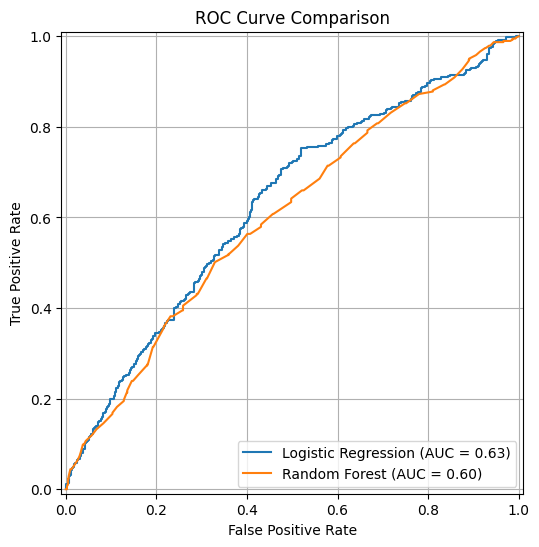

In [10]:
# Create a figure for the plot
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the ROC curve for the Logistic Regression model
RocCurveDisplay.from_estimator(log_reg, X_test, y_test, name='Logistic Regression', ax=ax)

# Plot the ROC curve for the Random Forest model on the same axes
RocCurveDisplay.from_estimator(rand_forest, X_test, y_test, name='Random Forest', ax=ax)

# Add a title and labels
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.show()

In [11]:
import joblib

# --- Save Logistic Regression ---------
chosen_model = log_reg
model_filename = '../models/ufc_predictor_log_reg.joblib'


# Save the trained model to the file
joblib.dump(chosen_model, model_filename)

print(f"Model saved successfully to {model_filename}")

# You can also test loading it back to be sure
loaded_model = joblib.load(model_filename)
print("\nModel loaded successfully.")
print("Loaded model type:", type(loaded_model))

Model saved successfully to ../models/ufc_predictor_log_reg.joblib

Model loaded successfully.
Loaded model type: <class 'sklearn.linear_model._logistic.LogisticRegression'>
